In [2]:
from plantcv import plantcv as pcv
import matplotlib

In [3]:
class options:
    def __init__(self):
        self.image = "./seedling_imgs/top_1.jpg"
        self.debug = "plot"
        self.writeimg= False
        self.result = "vis_tutorial_results.json"
        self.outdir = "." # Store the output to the current directory

# Get options
args = options()

# Set debug to the global parameter 
pcv.params.debug = args.debug

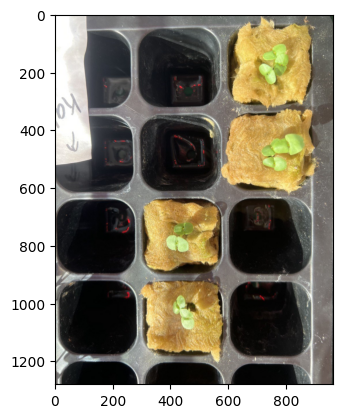

In [4]:
img, path, filename = pcv.readimage(filename=args.image)

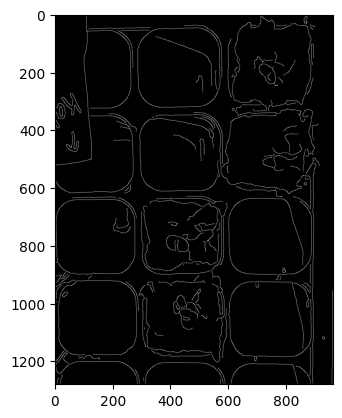

In [5]:
edges = pcv.canny_edge_detect(img, sigma=3)

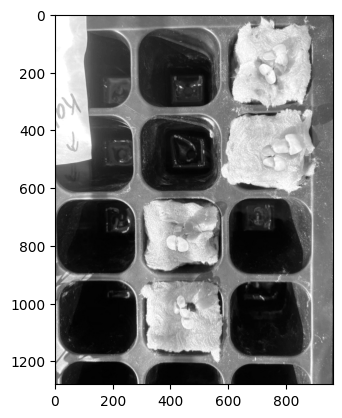

array([[255, 255, 255, ...,  58,  59,  60],
       [255, 255, 255, ...,  58,  60,  60],
       [255, 255, 255, ...,  58,  60,  60],
       ...,
       [ 93,  95,  98, ...,  42,  45,  45],
       [ 91,  93,  97, ...,  43,  45,  45],
       [ 90,  92,  97, ...,  46,  46,  46]], dtype=uint8)

In [6]:
pcv.rgb2gray_hsv(rgb_img=img, channel="v")

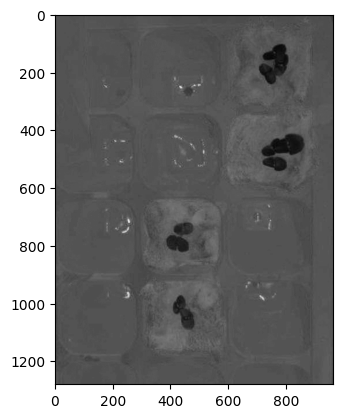

In [7]:
#   channel- Split by 'l' (lightness), 'a' (green-magenta), or 'b' (blue-yellow) channel
a = pcv.rgb2gray_lab(rgb_img=img, channel='a')


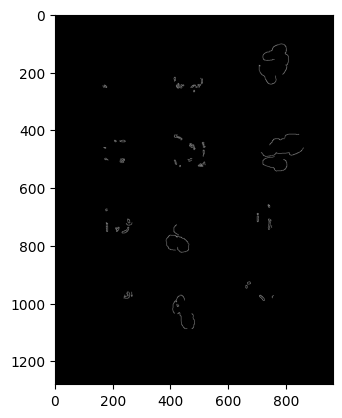

In [8]:
edges = pcv.canny_edge_detect(a, sigma=0.5)

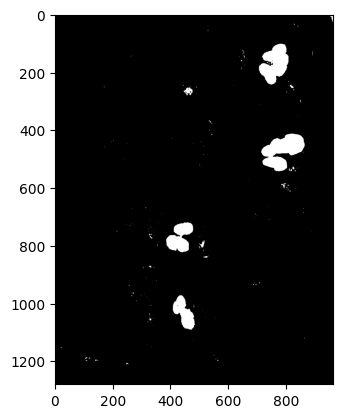

In [9]:
a_thresh = pcv.threshold.binary(gray_img=a, threshold=120, max_value=255, 
                                object_type='dark')

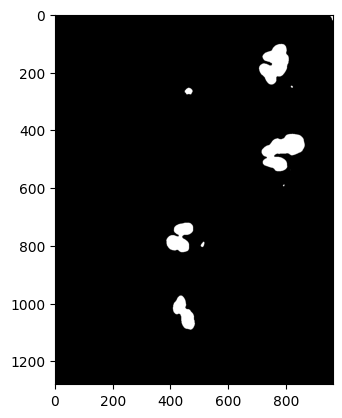

In [10]:
s_mblur = pcv.median_blur(gray_img=a_thresh, ksize=10)

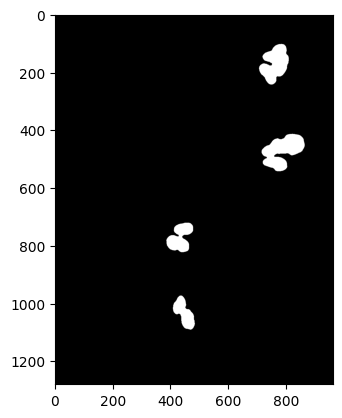

In [11]:
fill_image = pcv.fill(bin_img=s_mblur, size=1000)

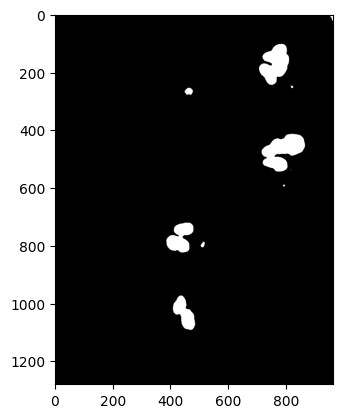

In [12]:
# https://www.cs.auckland.ac.nz/courses/compsci773s1c/lectures/ImageProcessing-html/topic4.htm
dilated = pcv.dilate(gray_img=s_mblur, ksize=2, i=1)


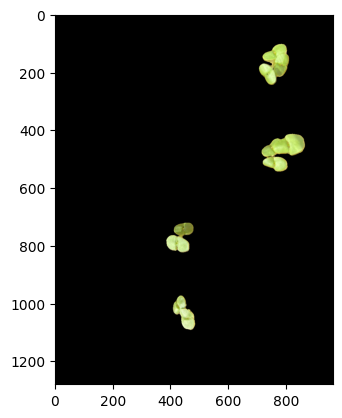

In [10]:
masked = pcv.apply_mask(img=img, mask=dilated, mask_color='black')


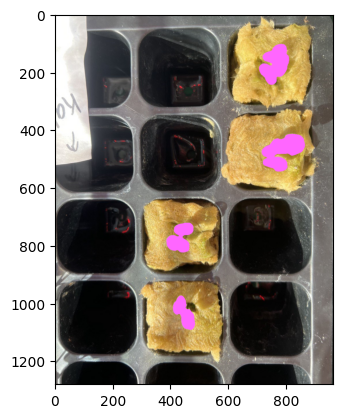

In [11]:
id_objects, obj_hierarchy = pcv.find_objects(img=img, mask=dilated)

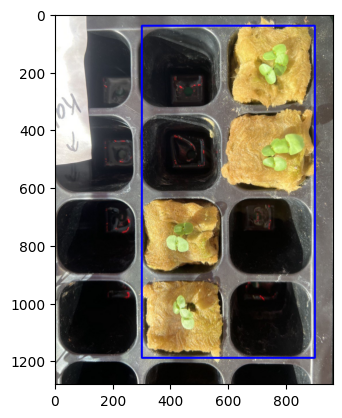

In [12]:
roi_contour, roi_hierarchy = pcv.roi.rectangle(img=img, x=300, y=40, h=1150, w=600)


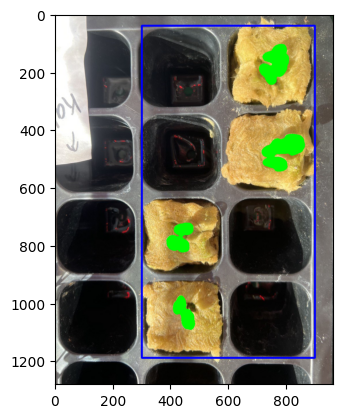

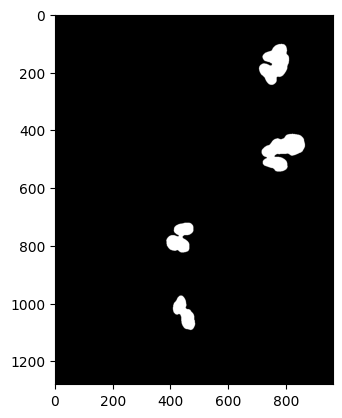

In [13]:
roi_objects, roi_obj_hierarchy, kept_mask, obj_area = pcv.roi_objects(img=img, roi_contour=roi_contour, 
                                                                      roi_hierarchy=roi_hierarchy,
                                                                      object_contour=id_objects, 
                                                                      obj_hierarchy=obj_hierarchy, 
                                                                      roi_type='partial')

In [14]:
in_bounds = pcv.within_frame(mask=kept_mask, label="default")


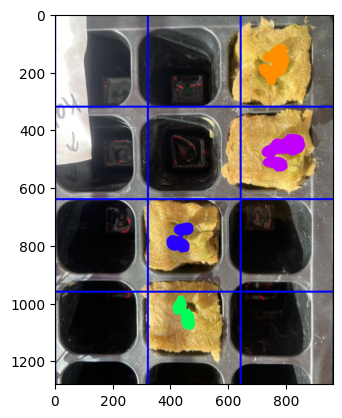

In [15]:
clusters_i, contours, hierarchies = pcv.cluster_contours(img=img, roi_objects=roi_objects, 
                                                         roi_obj_hierarchy=roi_obj_hierarchy, 
                                                         nrow=4, ncol=3, 
                                                         show_grid=True)

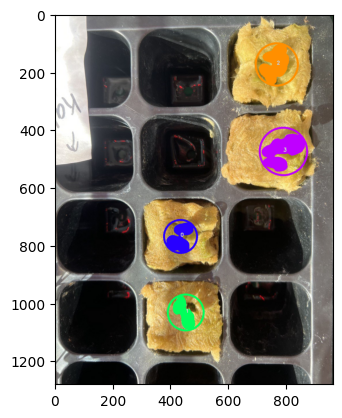

In [16]:
cluster_img = pcv.visualize.clustered_contours(img=img, grouped_contour_indices=clusters_i, 
                                                roi_objects=contours,
                                                roi_obj_hierarchy=hierarchies)

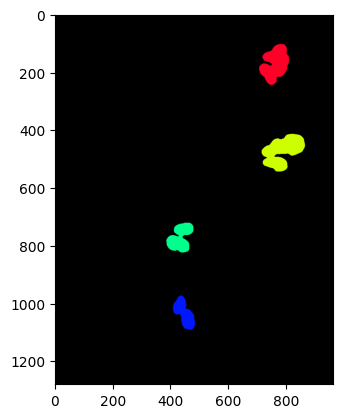

In [17]:
clust_img, clust_masks = pcv.spatial_clustering(mask=kept_mask, algorithm="DBSCAN", min_cluster_size=4, max_distance=None)


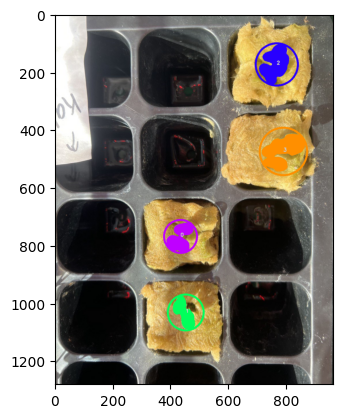

In [18]:
pcv.params.color_sequence = 'random'
cluster_img = pcv.visualize.clustered_contours(img=img, grouped_contour_indices=clusters_i, 
                                                roi_objects=contours,
                                                roi_obj_hierarchy=hierarchies)

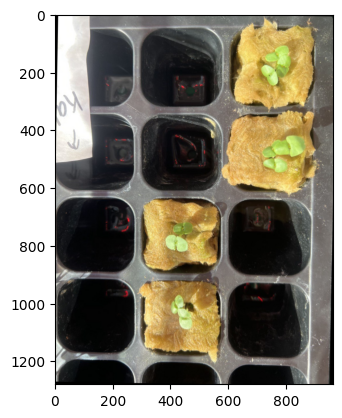

In [48]:
rotate_img = pcv.transform.rotate(img=img, rotation_deg=-1, crop=True)

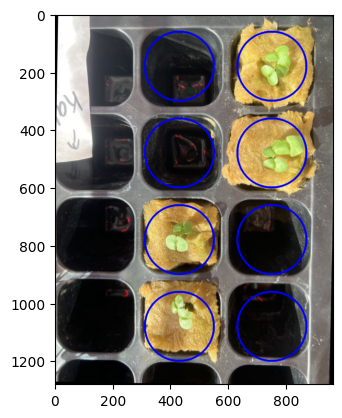

In [50]:
rois1, roi_hierarchy1 = pcv.roi.multi(img=rotate_img, coord=(430,180), radius=120, spacing=(320, 300), nrows=4, ncols=2)


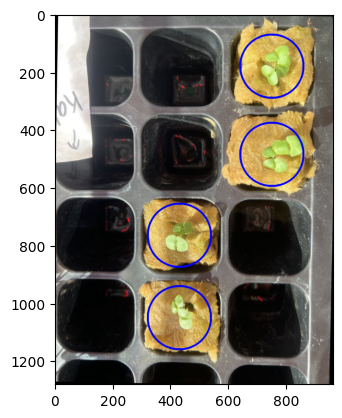

In [53]:
rois2, roi_hierarchy2 = pcv.roi.multi(img=rotate_img, coord=[(430,765), (430,1050), (750, 180), (750, 485)], radius=110)

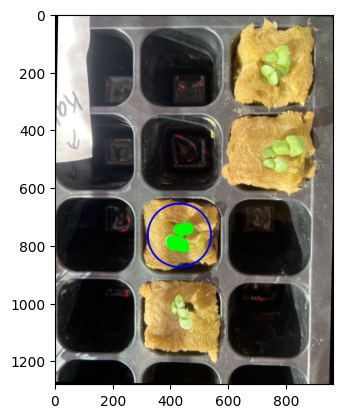

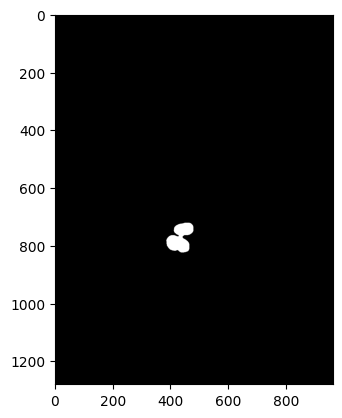

In [58]:
roi = rois2[0]
hierarchy = roi_hierarchy2[0]

filtered_contours, filtered_hierarchy, filtered_mask, filtered_area = pcv.roi_objects(
        img=rotate_img, roi_type="partial", roi_contour=roi, roi_hierarchy=hierarchy, object_contour=roi_objects, 
        obj_hierarchy=roi_obj_hierarchy)

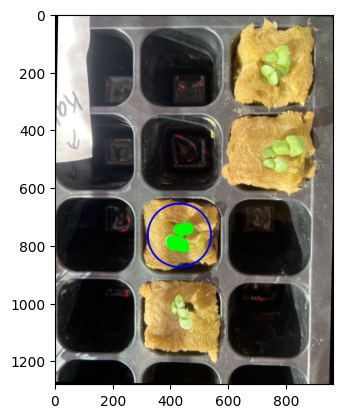

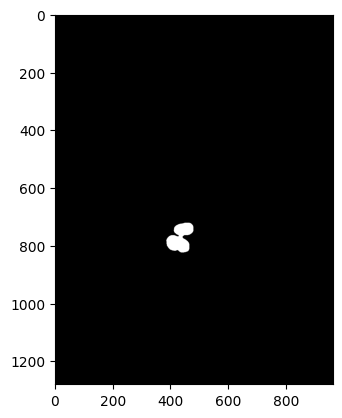

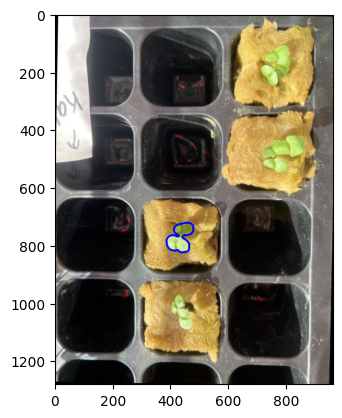

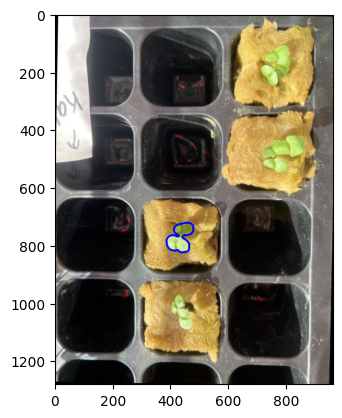

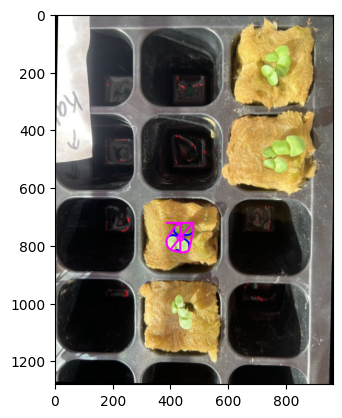

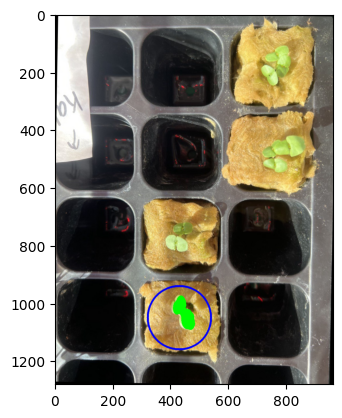

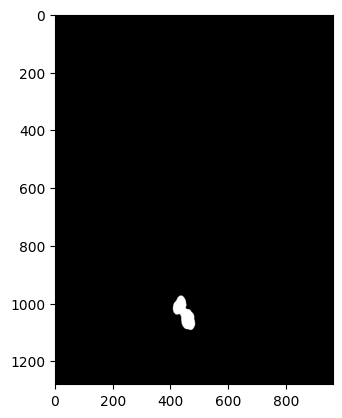

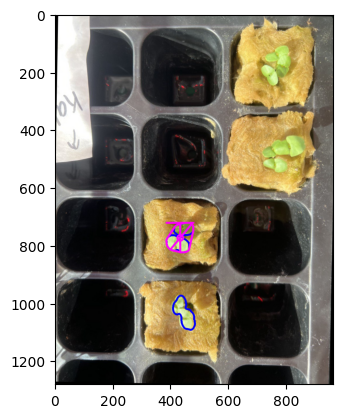

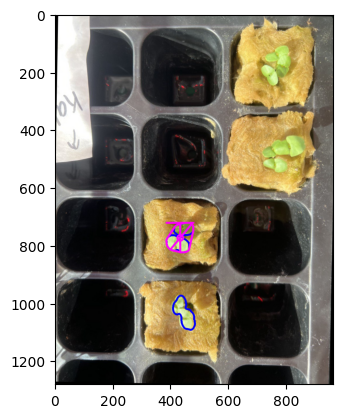

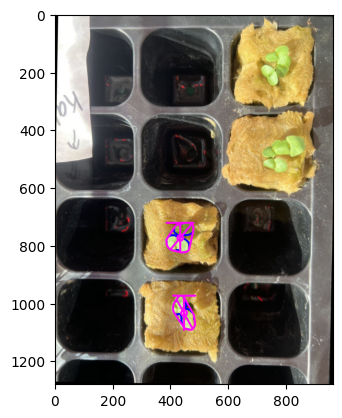

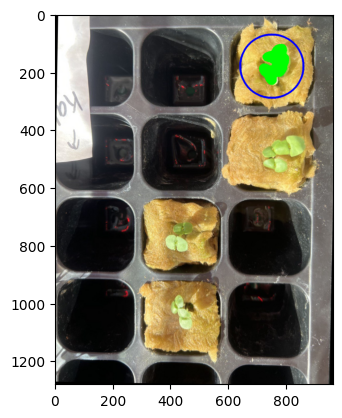

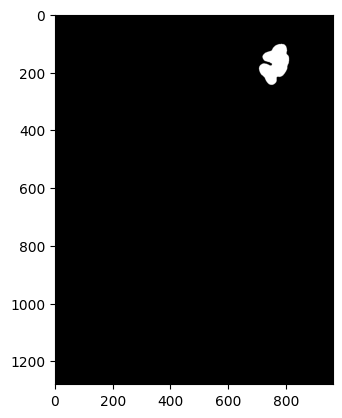

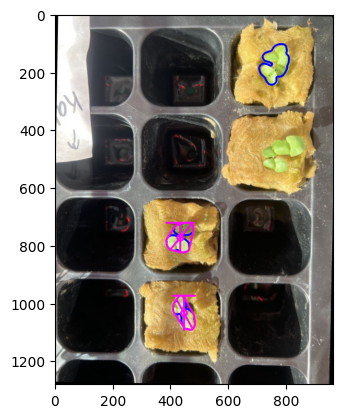

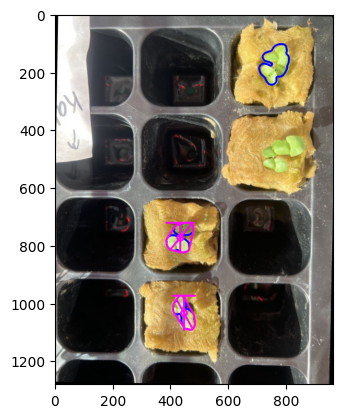

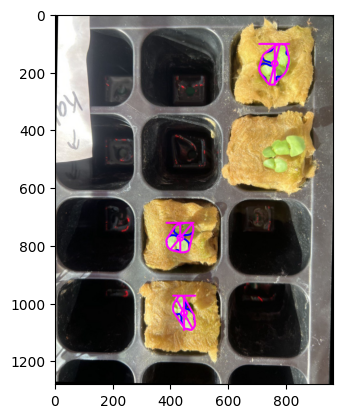

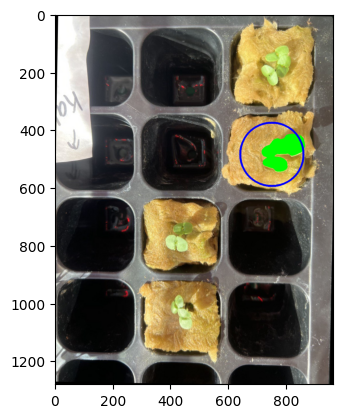

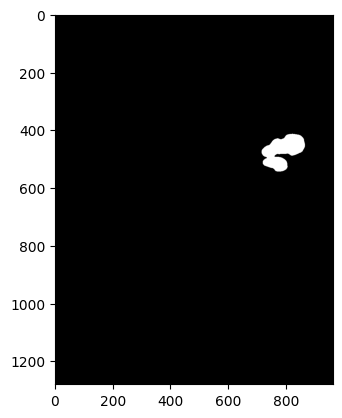

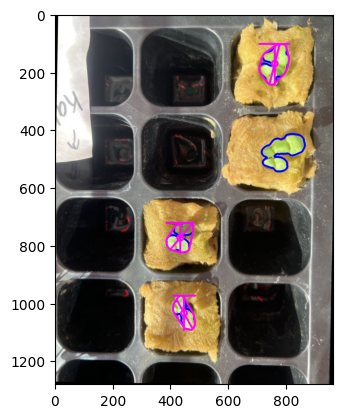

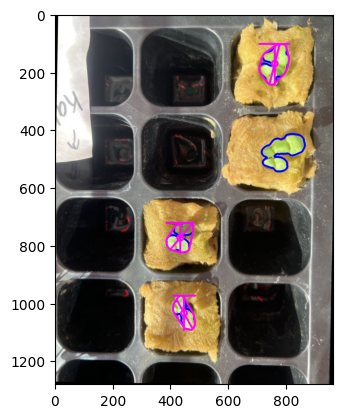

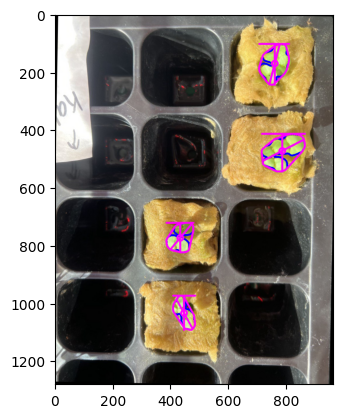

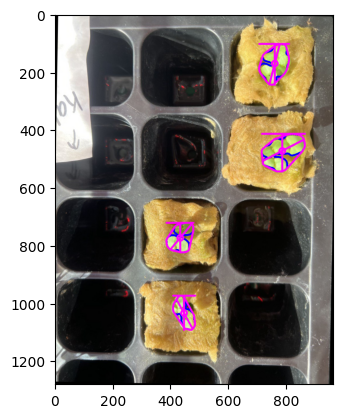

In [59]:
import numpy as np

img_copy = np.copy(rotate_img)

for i in range(0, len(rois2)):
    roi = rois2[i]
    hierarchy = roi_hierarchy2[i]
    # Filter objects by ROI 
    filtered_contours, filtered_hierarchy, filtered_mask, filtered_area = pcv.roi_objects(
        img=rotate_img, roi_type="partial", roi_contour=roi, roi_hierarchy=hierarchy, object_contour=roi_objects, 
        obj_hierarchy=roi_obj_hierarchy)

    # Combine objects together in each plant     
    plant_contour, plant_mask = pcv.object_composition(img=img_copy, contours=filtered_contours, hierarchy=filtered_hierarchy)        

    # Analyze the shape of each plant 
    img_copy = pcv.analyze_object(img=img_copy, obj=plant_contour, mask=plant_mask, label=str(i))

# The save results function will take the measurements stored when running any PlantCV analysis functions, format, 
# and print an output text file for data analysis. The Outputs class stores data whenever any of the following functions
# are ran: analyze_bound_horizontal, analyze_bound_vertical, analyze_color, analyze_nir_intensity, analyze_object, 
# fluor_fvfm, report_size_marker_area, watershed. If no functions have been run, it will print an empty text file 
pcv.outputs.save_results(filename=args.result)

# Plot out the image with shape analysis on each plant in the image 
pcv.plot_image(img_copy)

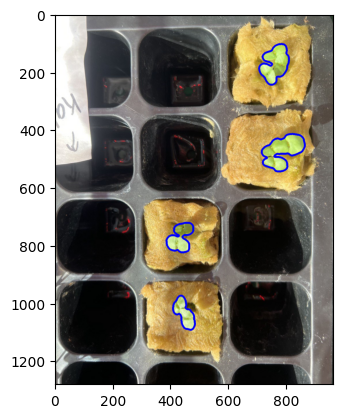

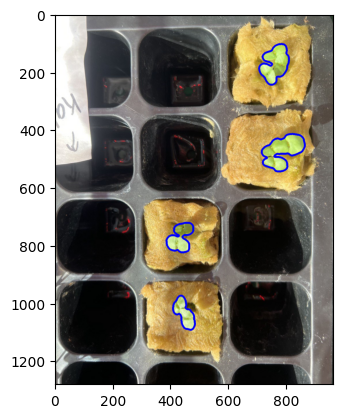

In [22]:
import numpy as np
img_copy = np.copy(img)

plant_contour, plant_mask = pcv.object_composition(img=img_copy, contours=contours, hierarchy=hierarchies)
img_copy = pcv.analyze_object(img=img_copy, obj=contours, mask=kept_mask, label="test")
pcv.plot_image(img_copy)
